In [2]:
import numpy as np
import pandas as pd


In [6]:
images_train = pd.read_csv("train.csv")

In [7]:
images_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
images_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [9]:
images_train.shape()

TypeError: 'tuple' object is not callable

In [10]:
images_train.shape


(42000, 785)

In [12]:
images_data = np.array(images_train.drop(['label' ], axis = 1))

In [13]:
import matplotlib.pyplot as plt

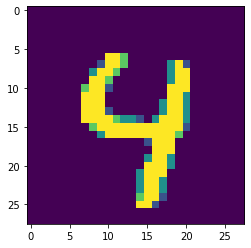

In [15]:
plt.imshow(images_data[78].reshape(28,28) )

NameError: name 'scale' is not defined

In [17]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split


In [18]:
X = scale(images_train.drop('label' , axis = 1 ).values)
y = np.array(images_train['label'])

In [26]:
X.shape

(42000, 784)

In [27]:
y.shape

(42000,)

In [39]:
X_train , X_test , y_train, y_test = train_test_split(X , y , test_size = 2000)

In [40]:
# ONE hot encoding 

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


In [42]:
num_classes = y_train.shape[1]

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten


In [43]:
def baseModel():
    model = Sequential()
    model.add(Dense(784,input_dim = 784 ,kernel_initializer = 'normal' , activation = 'relu'))
    model.add(Dense(num_classes, kernel_initializer = 'normal' , activation = 'softmax'))
    
    
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

    
    return model

In [44]:
model1 = baseModel()

In [45]:
model1.fit(X_train ,y_train ,validation_data = (X_test , y_test) , epochs = 20 , batch_size = 200 , verbose = 2)




Epoch 1/20
200/200 - 1s - loss: 0.2967 - accuracy: 0.9177 - val_loss: 0.2030 - val_accuracy: 0.9470
Epoch 2/20
200/200 - 1s - loss: 0.1124 - accuracy: 0.9689 - val_loss: 0.1841 - val_accuracy: 0.9555
Epoch 3/20
200/200 - 1s - loss: 0.0652 - accuracy: 0.9819 - val_loss: 0.1655 - val_accuracy: 0.9650
Epoch 4/20
200/200 - 1s - loss: 0.0379 - accuracy: 0.9898 - val_loss: 0.1648 - val_accuracy: 0.9660
Epoch 5/20
200/200 - 1s - loss: 0.0237 - accuracy: 0.9944 - val_loss: 0.1787 - val_accuracy: 0.9670
Epoch 6/20
200/200 - 1s - loss: 0.0165 - accuracy: 0.9971 - val_loss: 0.1655 - val_accuracy: 0.9680
Epoch 7/20
200/200 - 1s - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.1702 - val_accuracy: 0.9680
Epoch 8/20
200/200 - 1s - loss: 0.0080 - accuracy: 0.9993 - val_loss: 0.1707 - val_accuracy: 0.9705
Epoch 9/20
200/200 - 1s - loss: 0.0043 - accuracy: 0.9997 - val_loss: 0.1650 - val_accuracy: 0.9720
Epoch 10/20
200/200 - 1s - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.1726 - val_accuracy: 0.9715

NameError: name 'model' is not defined

In [46]:
scores = model1.evaluate(X_test , y_test , verbose = 0)
print("Baseline SCore : %.2f%%" % (100 - scores[1] * 100))

Baseline SCore : 2.80%


In [48]:
data_test = pd.read_csv("test.csv")

In [49]:
data_test.shape


(28000, 784)

In [50]:
X_test = scale(data_test.values)

In [51]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
predictions = model1.predict_classes(x = X_test, batch_size = 200 , verbose = 0)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [60]:
predictions.shape


(28000,)

In [61]:
predictions


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [62]:
submissions = pd.DataFrame({"ImageId" : list(range(1, len(predictions) +1)), "Label" : predictions})


In [63]:
submissions

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [64]:
submissions.to_csv("ANSWERS.csv" , index = False , header = True)